In [14]:
import pandas as pd 
import numpy as np
snf = pd.read_csv("Data/curr_complete_dataset_delete_columns.csv")
episodes = pd.read_csv("Data/episodes_dur.csv")

In [15]:
snf.head()

,PID,patient_number_year,M1,M2,M3,M4,M5,M6,M7,M8,...,M11,M12,ProviderName,lat,lng,county_name,num_mins,num_hours,num_weeks,num_CC
0,6,66,11,5,7,6,4,3,3,5,...,3,11,Accel at College Station,30.56255,-96.27564,Brazos,19298.0,321.633333,6.185256,0.154631
1,8,107,20,12,14,12,16,17,15,8,...,4,7,Accel at Willow Bend,33.03550,-96.81001,Collin,30459.0,507.650000,9.762500,0.244062
2,9,87,10,10,15,12,11,11,12,7,...,10,6,Adora Midtown Park,32.87767,-96.74979,Dallas,18959.0,315.983333,6.076603,0.151915
3,10,4,2,0,1,0,1,0,0,0,...,0,0,Advance Healthcare Solutions,33.85238,-98.54057,Wichita,1062.0,17.700000,0.340385,0.008510
4,11,25,4,6,5,6,3,4,1,1,...,0,0,Advanced Health and Rehabilitation Center of G...,32.85707,-96.57941,Dallas,7685.0,128.083333,2.463141,0.061579


In [16]:
num_snf = snf.groupby(['county_name']).size()

In [17]:
num_snf = num_snf.to_frame().reset_index()
num_snf.head()

,county_name,0
0,Anderson,5
1,Andrews,1
2,Angelina,8
3,Aransas,2
4,Archer,1


In [18]:
num_snf.columns = ['county_name', '#snf']
num_snf.head()

,county_name,#snf
0,Anderson,5
1,Andrews,1
2,Angelina,8
3,Aransas,2
4,Archer,1


In [19]:
snf2 = snf[['county_name','patient_number_year', 'num_CC']]
snf2.head()

,county_name,patient_number_year,num_CC
0,Brazos,66,0.154631
1,Collin,107,0.244062
2,Dallas,87,0.151915
3,Wichita,4,0.008510
4,Dallas,25,0.061579


In [20]:
patient_cc_county = snf2.groupby(['county_name']).agg('sum').reset_index()
patient_cc_county.head()

,county_name,patient_number_year,num_CC
0,Anderson,87,0.206899
1,Andrews,1,0.004639
2,Angelina,283,0.617171
3,Aransas,37,0.086290
4,Archer,1,0.002524


In [21]:
county_level_data = patient_cc_county.merge(num_snf, on = 'county_name')
county_level_data.head()

,county_name,patient_number_year,num_CC,#snf
0,Anderson,87,0.206899,5
1,Andrews,1,0.004639,1
2,Angelina,283,0.617171,8
3,Aransas,37,0.086290,2
4,Archer,1,0.002524,1


In [22]:
for index, row in county_level_data.iterrows():
    county_level_data.loc[index, 'CC_hired'] = np.ceil(row.num_CC)

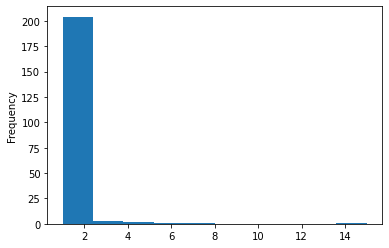

In [23]:
county_level_data.CC_hired.plot.hist();

In [24]:
county_level_data.head()

,county_name,patient_number_year,num_CC,#snf,CC_hired
0,Anderson,87,0.206899,5,1.0
1,Andrews,1,0.004639,1,1.0
2,Angelina,283,0.617171,8,1.0
3,Aransas,37,0.086290,2,1.0
4,Archer,1,0.002524,1,1.0


In [25]:
county_level_data.to_csv("Data/CountyData.csv", index = False)